Vorarbeiten, Bibliotheken laden
 - normale
 - spacy
 - wordcloud

In [1]:
# normale Bibliotheken laden
import urllib.request
import re
from collections import Counter
import pandas as pd

In [3]:
# spacy Command Line Interface zum Installieren nutzen
import spacy.cli
spacy.cli.download("de_core_news_md")

# spacy laden
import spacy
nlp = spacy.load('de_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_md')


In [8]:
# alles für WordCloud nötige
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS  # für Wordcloud - hier auch spezielle stopwrdliste laden

import matplotlib.pyplot as plt # zum Zeichnen der Wolke
import numpy as np              # zum Rechnen 

# bei Bedarf stopword erweitern
uninteressant = "insbesonders darüber"
liste_der_unerwuenschten_woerter = uninteressant.split()
STOPWORDS.update(liste_der_unerwuenschten_woerter)

Prozeduren definieren
 - lese Kapitel auf www.bibwlserver.com
 - lese alle Kapitel je Buch
 - top30 Wörter eines Buch bestimmen
 - wordcloud aus diesen Wörtern zeichnen


In [5]:
# Buchkapitel lesen
def lese_kapitel(buch, kptnr):
    # Parameter, sonst steht python im Zugriiffsheader und das mögen manche server nicht
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; UTF8; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    headers={'User-Agent':user_agent,} 
    
    # open a connection to a URL using urllib
    # url = "https://www.bibleserver.com/LUT/Markus1"
    if (buch == "Mat"):
        url = "https://www.bibleserver.com/LUT/Matth%C3%A4us" + kptnr  #übersetzer'.encode('punycode').decode() 
    elif (buch == "Rom"):
        url = "https://www.bibleserver.com/LUT/R%C3%B6mer" + kptnr  #übersetzer'.encode('punycode').decode() 
    else:  
        url = "https://www.bibleserver.com/LUT/"+ buch + "/" + kptnr
    # print(url)
      
    request=urllib.request.Request(url,None,headers) #The assembled request

    response = urllib.request.urlopen(request)

    data = response.read().decode(response.headers.get_content_charset()) # The data u need # decode nachUTF8 wegen Umlauten....

    # relevanten Teil rausschneiden
    phs = re.findall(r'<span class="verse-content--hover">(.*?)</span>',str(data))
    # print(phs)
    doc = ""
    for eachP in phs:
        doc = doc + " " + eachP

    return doc

In [7]:
# alle Kapitel eines Buchs lesen und zusammenfügen
def lese_buch(buch,kapmax):        
    buchtext = ""
    kap      = 1
    while kap <= kapmax: 
        # print(kap)
        kapitel = lese_kapitel(buch,str(kap))
        buchtext = buchtext + kapitel
        kap = kap + 1

    return(buchtext)

Jetzt kommt die eigentliche Textanalyse mit Spacy

In [93]:
def korr_token(tx):
    for token in tx:
        if token.lemma_ == "sage":
            token.lemma_ = "sagen"     
 
        if token.lemma_ == "sprachen":
            token.lemma_ = "sprechen"     

        if token.lemma_ == "spricht":
            token.lemma_ = "sprechen"     

        if token.lemma_ == "Herrn":
            token.lemma_ = "Herr"

        if token.lemma_ == "siehe" or token.lemma_ == "Siehe":
            token.lemma_ = "sehen"     
 
        if token.lemma_ == "weiß" and token.pos_ == "VERB":
            token.lemma_ = "wissen" 

        if token.lemma_ == "isst" :
            token.lemma_ = "essen"

        if token.lemma_ == "Grüßt" :
            token.lemma_ = "grüssen"     

        if token.lemma_ == "Jüngern" :
            token.lemma_ = "Jünger"     
  
        if token.lemma_ == "sollen" and token.pos_ == "VERB":
            token.pos_ = "AUX"     

    return(tx) 


def token_text(doc):
    # tokenizer
    pos_list = ["NOUN", "PROPN","VERB"]
    # pos_list = ["VERB"]

    text= nlp(doc)
    # umkodieren, was besser geht
    text = korr_token(text)

    #remove stopwords and punctuations / nur noun verbs
    words = [token.lemma_ for token in text if token.is_stop != True and token.is_punct != True and pos_list.count(token.pos_)>0]

    word_freq = Counter(words)

    # Was sind die top 30?
    common_words = word_freq.most_common(30)
    t_dict = dict(common_words) # als dictionary speichern

    return t_dict

In [10]:
def zeichne_worldcloud(t_dict):

    # Maske für WordCloud erstellen
    x, y = np.ogrid[:1500, :1500]
    #mask = (x - 700) ** 2 + (y - 700) ** 2 > 600 ** 2
    #mask = 255 * mask.astype(int)

    # Generate a word cloud image
    # wordcloud = WordCloud(background_color="white",width=1920, height=1080, mask=mask).generate_from_frequencies(mat_t) # mit Kreis-Maske
    wordcloud = WordCloud(background_color="black",width=1920, height=1080).generate_from_frequencies(t_dict) # Eingabe als dictionary wort:Anhzahl

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()



Eigentliche Abarbeitung der Buchliste

{'sprechen': 161, 'Jesus': 87, 'sehen': 75, 'sagen': 61, 'Vater': 47, 'Herr': 42, 'hören': 42, 'zeugen': 39, 'Volk': 36, 'Himmel': 35, 'Jünger': 31, 'Bruder': 29, 'geben': 29, 'kommen': 29, 'bringen': 27, 'Sohn': 27, 'reden': 27, 'stehen': 26, 'Prophet': 25, 'Haus': 25, 'nehmen': 24, 'Johannes': 23, 'antworten': 23, 'Kind': 22, 'Himmelreich': 22, 'werfen': 22, 'Auge': 22, 'treten': 21, 'Land': 20, 'Erde': 20}


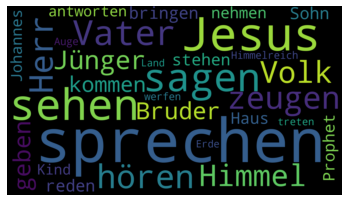

{'sprechen': 242, 'Jesus': 130, 'sehen': 112, 'glauben': 88, 'gehen': 70, 'sagen': 66, 'Hand': 66, 'Grab': 55, 'kommen': 50, 'hören': 50, 'reden': 48, 'Maria': 43, 'Herr': 42, 'Gott': 41, 'sitzen': 40, 'predigen': 35, 'Dämonen': 34, 'Wort': 34, 'auferstehen': 34, 'Zeichen': 32, 'austreiben': 31, 'Petrus': 31, 'Mutter': 31, 'fragen': 31, 'Stein': 31, 'Himmel': 30, 'verkünden': 29, 'hingehen': 29, 'fangen': 28, 'Jüngern': 28}


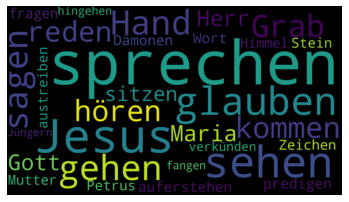

{'sprechen': 356, 'Sohn': 123, 'sehen': 122, 'Herr': 105, 'sagen': 101, 'Jesus': 98, 'Gott': 64, 'hören': 59, 'Volk': 57, 'Vater': 56, 'geben': 53, 'Haus': 48, 'antworten': 47, 'geschehen': 47, 'stehen': 46, 'kommen': 46, 'finden': 44, 'Frau': 43, 'Reich': 42, 'Stadt': 40, 'Kind': 37, 'tun': 37, 'lassen': 37, 'Geist': 36, 'reden': 35, 'Himmel': 35, 'Johannes': 33, 'senden': 31, 'nehmen': 31, 'Jerusalem': 31}


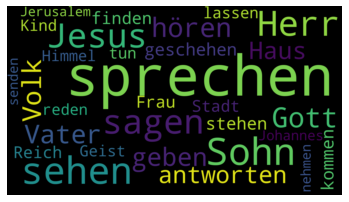

{'sprechen': 259, 'Jesus': 248, 'Vater': 136, 'sehen': 103, 'glauben': 88, 'Welt': 79, 'antworten': 79, 'Jude': 69, 'kommen': 67, 'geben': 64, 'tun': 60, 'senden': 58, 'sagen': 57, 'Herr': 52, 'Jünger': 52, 'hören': 51, 'reden': 51, 'lieben': 50, 'Wort': 47, 'Sohn': 46, 'Leben': 45, 'wissen': 44, 'bleiben': 39, 'gehen': 37, 'nehmen': 34, 'Petrus': 33, 'Gott': 32, 'kennen': 31, 'Spricht': 30, 'fragen': 29}


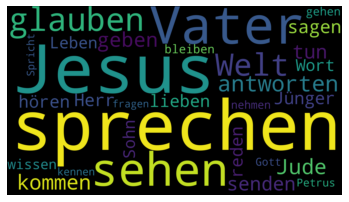

{'sprechen': 190, 'Paulus': 137, 'Mann': 109, 'Herr': 107, 'kommen': 88, 'hören': 87, 'sehen': 86, 'Volk': 85, 'lassen': 81, 'Jude': 74, 'Geist': 72, 'Jerusalem': 60, 'Name': 60, 'reden': 59, 'Jesus': 58, 'Petrus': 57, 'Bruder': 57, 'stehen': 55, 'Wort': 55, 'Hand': 51, 'Gott': 50, 'ziehen': 49, 'geschehen': 45, 'Stadt': 45, 'Haus': 41, 'fahren': 38, 'Vater': 37, 'bleiben': 35, 'senden': 35, 'führen': 34}


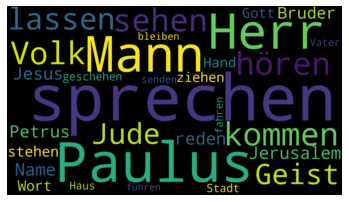

{'Gesetz': 78, 'Christus': 64, 'Gott': 64, 'Sünde': 54, 'Herr': 44, 'Gerechtigkeit': 38, 'Jesus': 34, 'Glaube': 33, 'Geist': 30, 'Gnade': 23, 'Heide': 23, 'schreiben': 23, 'leben': 23, 'tun': 23, 'sterben': 23, 'stehen': 22, 'Tod': 22, 'geben': 21, 'Jesaja': 21, 'Mose': 21, 'sagen': 20, 'Fleisch': 19, 'Bruder': 19, 'Leben': 19, 'Werk': 19, 'glauben': 17, 'wissen': 17, 'grüssen': 16, 'sprechen': 15, 'richten': 15}


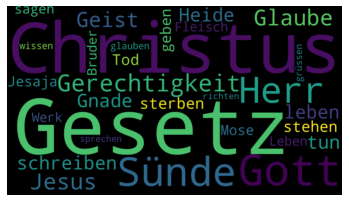

In [11]:
buecher = [("Mat",18), ("Markus",28), ("Lukas",24), ("Johannes",21), ("Apostelgeschichte",28), ("Rom",16)]
#buecher = [("Mat",18)]

# alle relevanten Wörter zusammenstellen pin eine Liste zusammenstellen
buch_liste = set()
wichtige_woerter = set() # set vermeidet doppelte Elemente
woerter_je_buch  = []  # dictionary mit wort + Liste der Bücher in denen es

lfnr = 1
for b, mk in buecher:    
    lfnr_b = (b, lfnr)
    buch_liste.update(lfnr_b) # die untersuchten Bücher werden der Reihe nach abgelegt
    buchtext = lese_buch(b,mk)
    top30    = token_text(buchtext)
    print(top30)
    zeichne_worldcloud(top30)

    wichtige_woerter.update(top30.keys())
    
    woerter_je_buch.append((b,top30))  # also buch + top30 als Eintrag wegschreiben        

    lfnr = lfnr + 1

     

Wie selektiv sind die gefundenen Wörter eigentlich?
rel. Häufigkeit im Text * Selektivität im Corpus    
d.h.  (wie oft/max wie oft) * log 10 ( Anzahl Dokumente im Corpus / Anzahl Dokumente mit disem Wort)

In [25]:
# alle relevanten Wörter zusammenstellen und prüfen, in wievielen Büchern sie vorkommen
alle_buecher = [("Mat",18), ("Markus",28), ("Lukas",24), ("Johannes",21), ("Apostelgeschichte",28), ("Rom",16),("1.Korinther",16),("2.Korinther",13),("Galater",6)]
df_anzahl = len(alle_buecher)

df_cnt = pd.DataFrame(columns =  ["buch"] + list(wichtige_woerter))
df_cnt.set_index("buch", inplace=True)

# lese alle Bücher
for b, mk in alle_buecher:    
    buchtext = lese_buch(b,mk)
    token_buch = nlp(buchtext)
    token_buch = korr_token(token_buch)

    # alle lemma in eine Liste packen
    lemma_list = []
    for t in token_buch:
        lemma_list.append(t.lemma_)

    # und in set umwandeln, denn so kommt jedes Wort nur einmal vor
    lemma_list = set(lemma_list) 

    # prüfe jedes Wort im untersuchten Buch    
    for lem in lemma_list:
        # vergleiche es mit jedem Wort aus relevanter Liste
        for k in wichtige_woerter:
            if k == lem: # sind sie gleich, erhöhe den Zähler für relevantes Wort
                df_cnt.at[b,lem] = 1

df_cnt.fillna(0, inplace=True) # NA auf 0 setzen, damit später besser gerechnet werden kann
df_cnt_ges = df_cnt.sum()


In [26]:
# wie wichtig ist ein Wort (Kommt es oft vor und ist es sensitiv?) in untersuchten Buch
# tf-idf Wert bestimmen
def wie_wichtig_ist_wort(top):
    tf_liste = []
    lfnr = 1
    for (w,a) in top.items():
        # da Top Wörter gesucht wurden, hat erster Listen-Eintrag tf = 1
        if lfnr == 1:
            n_max = a

        # tf = relative Häifigkeit eines Wortes in einem Dokument     
        tf = a /n_max

        # idf(Wort) = log ( Anzahl aller Dokument im Korpus / Anzahl Dokumente mit dem Wort) 
        idf = np.log10(df_anzahl / df_cnt_ges[w] )
        if  df_cnt_ges[w] > 0:
            z = 1
        else:    
            print(w,df_cnt_ges[w])

        # W ichtigkeit =  tf * idf
        tf_liste.append((w,tf,idf, tf*idf))

        lfnr = lfnr + 1

    return(tf_liste)    





In [61]:
# Je Buch die interessantesten Wörter listen
z_l = ["buch"] + list(wichtige_woerter)
wiwis = pd.DataFrame(columns =  z_l)
wiwis.set_index("buch", inplace=True)

# schleife über alle untersuchten Bücher
for b,topxx in woerter_je_buch:
    wichtig_liste = wie_wichtig_ist_wort(topxx)
    #print(wichtig_liste)
    for w in wichtig_liste:
      #print(w[0],w[3] )
      z = round(10000 * w[3]) # je Buch wird zum relevanten Wort die Wichtigkeit egschrieben
      wiwis.at[b,w[0]] = int(z) 
      

wiwis.fillna(0, inplace=True)
print(wiwis)

                   Land  Mutter  glauben  ...  Auge  predigen  Gesetz
buch                                      ...                        
Mat                 136       0        0  ...     0         0       0
Markus                0     140        0  ...     0        74       0
Lukas                 0       0        0  ...     0         0       0
Johannes              0       0        0  ...     0         0       0
Apostelgeschichte     0       0        0  ...     0         0       0
Rom                   0       0        0  ...     0         0    1091

[6 rows x 92 columns]


Land 136
Himmelreich 1304
werfen 241
bringen 86
antworten 252
Johannes 252
zeugen 853
Prophet 169
Erde 136
Haus 79
Jünger 492
treten 230


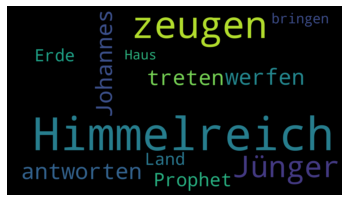

Mutter 140
Stein 140
sitzen 291
Petrus 226
Zeichen 68
Grab 580
hingehen 306
Jüngern 295
Dämonen 495
auferstehen 247
fragen 140
fangen 59
austreiben 611
Maria 313
verkünden 422
predigen 74


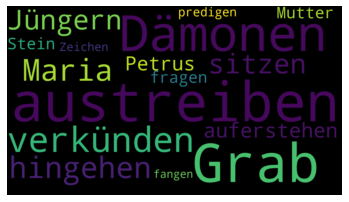

In [92]:
wiwis_tp = wiwis.transpose()
# print(wiwis_tp)

# print(wiwis_tp["Mat"])

# Mat
t_dict = wiwis_tp["Mat"]  #.to_dict

z_wocl_dic = {}
for (k,v) in t_dict.items():
    if v > 0:
        print(k,v)
        z_wocl_dic.update({k:v})

zeichne_worldcloud(z_wocl_dic) 


# Markus
t_dict = wiwis_tp["Markus"]  #.to_dict

z_wocl_dic = {}
for (k,v) in t_dict.items():
    if v > 0:
        print(k,v)
        z_wocl_dic.update({k:v})

zeichne_worldcloud(z_wocl_dic) 




In [13]:
print(df_cnt)

                   Land  Mutter  glauben  ...  Auge  predigen  Gesetz
buch                                      ...                        
Mat                   1       1        1  ...     1         1       1
Markus                1       1        1  ...     1         1       0
Lukas                 1       1        1  ...     1         1       1
Johannes              1       1        1  ...     1         0       1
Apostelgeschichte     1       1        1  ...     1         1       1
Rom                   1       1        1  ...     1         1       1
1.Korinther           0       0        1  ...     1         1       1
2.Korinther           0       0        1  ...     1         1       0
Galater               1       1        1  ...     1         1       1

[9 rows x 92 columns]


In [ ]:
# ner
doc = "Weihnachtsgeschichte"
#doc = "Thomas Mann sucht in Frankreich Bourdeaux"
text = nlp(doc)
labels = set([w.label_ for w in text.ents]) 
for label in labels: 
    entities = [e.string for e in text.ents if label==e.label_] 
    entities = list(set(entities)) 
    print( label,entities)

PER ['Jakobus', 'Herrn Bruder', 'Jesu Christi', 'Christi ', 'Sohn ']
MISC ['Judentum ', 'Judentum']
LOC ['Judäa', 'Damaskus', 'Jerusalem ', 'Jerusalem', 'Kilikien', 'Arabien ', 'Syrien ', 'Christi ']


In [ ]:
doc = "asddsa"
print(text)
    # umkodieren, was besser geht
words = [token.lemma_ for token in text if token.is_stop != True and token.is_punct != True ]

print(words)


Paulus, ein Knecht Christi Jesu, berufen zum Apostel, ausgesondert zu predigen das Evangelium Gottes, 2 das er zuvor verheißen hat durch seine Propheten in der Heiligen Schrift, 3 von seinem Sohn, der geboren ist aus dem Geschlecht Davids nach dem Fleisch, 4 der eingesetzt ist als Sohn Gottes in Kraft nach dem Geist, der da heiligt, durch die Auferstehung von den Toten – Jesus Christus, unserm Herrn. 5 Durch ihn haben wir empfangen Gnade und Apostelamt, den Gehorsam des Glaubens um seines Namens willen aufzurichten unter allen Heiden, 6 zu denen auch ihr gehört, die ihr berufen seid von Jesus Christus. 7 An alle Geliebten Gottes und berufenen Heiligen in Rom: Gnade sei mit euch und Friede von Gott, unserm Vater, und dem Herrn Jesus Christus!
['Paulus', 'Knecht', 'Christus', 'Jesu', 'berufen', 'Apostel', 'aussondern', 'predigen', 'Evangelium', 'Gott', '2', '  ', 'zuvor', 'verheißen', 'Prophet', 'Heilige', 'Schrift', '3', '  ', 'Sohn', 'gebären', 'Geschlecht', 'David', 'Fleisch', '4', ' 